# Question 1

Baten, Tack, and Baeder (1958) compared judges' scores on fish prepared by three methods. Twelve fish were cooked by each method, and several judges tasted fish samples and rated each on four variables:  
  
$y_1 =$ aroma,  
$y_2 =$ flavor,  
$y_3 =$ texture,  
$y_4 =$ moisture  
  
Each entry is an average score for the judges on that fish.

In [1]:
data <- read.table(file = "/Users/alexwiigs/Documents/Code/STAT 553 Assigmnents/Assignment 4/T6_17_FISH.DAT")
colnames(data) = c("Method", "Aroma", "flavor", "Texture", "Moisture")
n <- 12
k <- 3
method1 <- as.matrix(data[c(data[,1] == 1), 2:5])
method2 <- as.matrix(data[c(data[,1] == 2), 2:5])
method3 <- as.matrix(data[c(data[,1] == 3), 2:5])
t(data)

Method,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,1.0,1.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
Aroma,5.4,5.2,6.1,4.8,5.0,5.7,6.0,4,5.7,5.6,...,4.9,5.7,4.2,6.0,5.1,4.8,5.3,4.6,4.5,4.4
flavor,6.0,6.5,5.9,5.0,5.7,6.1,6.0,5,5.4,5.2,...,5.1,5.2,4.6,5.3,5.2,4.6,5.4,4.4,4.0,4.2
Texture,6.3,6.0,6.0,4.9,5.0,6.0,5.8,4,4.9,5.4,...,5.9,6.4,5.3,5.8,6.2,5.7,6.8,5.7,5.0,5.6
Moisture,6.7,5.8,7.0,5.0,6.5,6.6,6.0,5,5.0,5.8,...,6.5,6.4,6.3,6.4,6.5,5.7,6.6,5.6,5.9,5.5


## Final exam follow along

In [ ]:
overall_mean <- as.matrix(colSums(data[,-1]) / (n * ni))

## Back to the assignment

Calculate the necessary H and E matrices:

In [3]:
method. <-cbind(colSums(data[c(data[,1] ==1), 2:5]),colSums(data[c(data[,1] ==2), 2:5]),colSums(data[c(data[,1] ==3), 2:5]))
method.. <- matrix(rowSums(method.), nrow =4, ncol =1)

H <- (1/n) * (method.[,1] %*% t(method.[,1]) + method.[,2] %*% t(method.[,2]) + method.[,3] %*% t(method.[,3])) - (1 / (k *n) * method.. %*% t(method..) )
round(H,2)


Aroma,flavor,Texture,Moisture
1.05,2.17,-1.38,-0.76
2.17,4.88,-2.37,-1.26
-1.38,-2.37,2.38,1.38
-0.76,-1.26,1.38,0.81


In [4]:
E <- matrix(nrow = 4, ncol = 4)
E[,] = 0
for (i in 1:12) {E = E + method1[i,] %*% t(method1[i,]) + method2[i,] %*% t(method2[i,]) + method3[i,] %*% t(method3[i,])}
E = E - (1/n) * (method.[,1] %*% t(method.[,1]) + method.[,2] %*% t(method.[,2]) + method.[,3] %*% t(method.[,3]))
round(E,2)

Aroma,flavor,Texture,Moisture
13.41,7.72,8.67,5.86
7.72,8.48,7.53,6.21
8.67,7.53,11.61,7.04
5.86,6.21,7.04,10.57


**a)** Find linear discriminat functions.

$\textbf{E}^{-1} \textbf{H}$ is not symmetric, so we calculate the eigenvectors of the symmetric matrix $(\textbf{U}^{-1})'\textbf{H} \textbf{U}^{-1}$, whose eigenvalues are the same as $\textbf{E}^{-1} \textbf{H}$, where $\textbf{E} = \textbf{U}'\textbf{U}$ is the cholesky factoriazation of $\textbf{E}$.

In [5]:
library(Matrix)
U <- chol(E)
eigens <- eigen( t(solve(U)) %*% H %*% solve(U) )
eigens

eigen() decomposition
$values
[1] 2.951475e+00 1.273244e-01 3.694152e-14 3.894773e-15

$vectors
           [,1]         [,2]       [,3]        [,4]
[1,] -0.1629303 -0.001276861  0.5562488  0.81488606
[2,] -0.4432661 -0.868333598 -0.2151256  0.05685841
[3,]  0.8223397 -0.492125634  0.2840017 -0.03021274
[4,]  0.3173740  0.061704881 -0.7507671  0.57603387


if $\textbf{b}$ is an eigenvector of $(\textbf{U}^{-1})'\textbf{H} \textbf{U}^{-1}$, then $\textbf{a} = \textbf{U}^{-1}\textbf{b}$ is an eigenvector of $\textbf{E}^{-1}\textbf{H}$. we have two nonzero eigenvalues, so from the two accompanying eigenvectors we obtain our discriminant functions.

In [6]:
a <- unname( cbind( -solve(U) %*% eigens$vectors[,1], -solve(U) %*% eigens$vectors[,2]) )
colnames(a) <- c("a1'", "a2'")
t(round(a,3))

a1',0.021,0.533,-0.347,-0.135
a2',-0.317,0.298,0.243,-0.026


where $$z_i = \textbf{a}_i' \textbf{y}$$

**b)** Find the relative importance of each discriminant function.

The realtive importance of each discriminant function is found with the formula:
$$\frac{\lambda_i}{\sum_{j=1}^s \lambda_j}$$
where $\lambda_i$ is the eigenvalue of the accompanying discriminant function.

In [7]:
Importance <- cbind(eigens$values[1] / ( eigens$values[1] + eigens$values[2] ), eigens$values[2] / ( eigens$values[1] + eigens$values[2] ) )
colnames(Importance) <- c("z1", "z2")
rownames(Importance) <- c("Relative Importance:")
round(Importance,4)


,z1,z2
Relative Importance:,0.9586,0.0414


We see that $z_1$ accounts for about 96% of the group differences, while $z_2$ accounts for about 4%.

**c)** Plot the first two disciminant functions to show the group separation for three methods. 

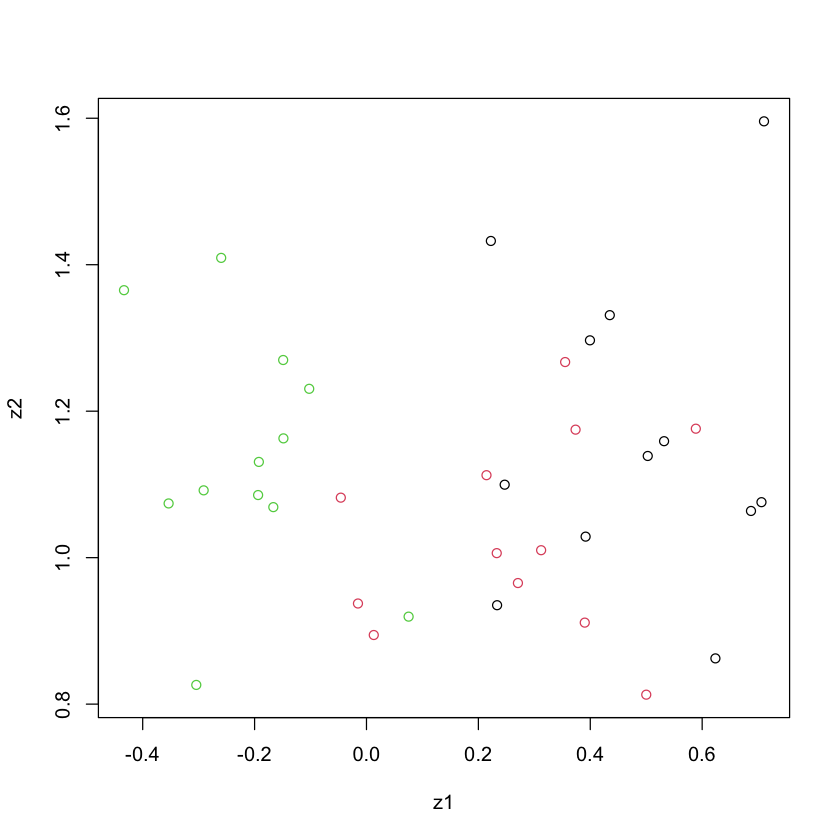

In [8]:
z1 <- t(a[,1]) %*% t(data[,-1])
z2 <- t(a[,2]) %*% t(data[,-1])
plot(z1,z2, col = data$Method )

Plotting shows group seperation (marked by different colours) and the graph shows what we would expect given the group importance of each discriminant function.